In [19]:
data_dir= '/n/holylfs/LABS/wadduwage_lab/Lab/wadduwage-lab-data/Confocal/20200210_confocal-3d_Seeber-lab_h2ax-cells/63xZseriesSmall'

In [20]:
import glob
from tifffile import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import skimage.filters
import torch
import shutil, os
import cv2
import torchvision

In [21]:
def preprocess(img):
    B= 134.28
    img_clipped = np.clip(im_max, B, 500) 
    img_norm= (img_clipped - img_clipped.min())/(img_clipped.max()- img_clipped.min())
    return img_norm

In [22]:
import glob

In [53]:
save_dir= '/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/63xZseriesSmall_w1/few_sample_large_imgs'

sample_dirs =  sorted(glob.glob(f'{data_dir}/*_w1*.stk'), key= lambda x: int(x.split('/')[-1][:-4].split('_')[-1][1:]))
n_stk_files= len(sample_dirs)

val_img_files= sample_dirs[int(n_stk_files*0.8):int(n_stk_files*0.9)]

In [54]:
x_=[]
for img_file_dir in val_img_files:
    img= imread(img_file_dir)
    im_max= np.max(img, axis=0)
    im_max_filt= torch.from_numpy(preprocess(im_max).astype('float'))
    x_.append(im_max_filt.numpy())
x_ = np.array(x_)

In [60]:
x_.shape

(21, 2304, 2304)

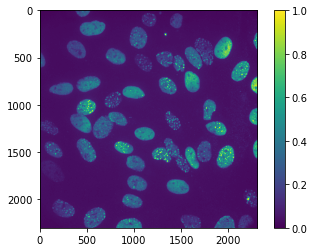

16


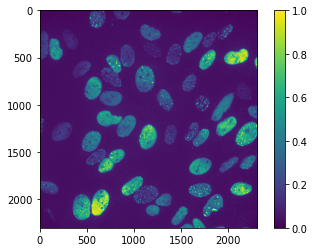

18


In [63]:

imgs= x_
for idx in [16, 18]:
    #idx= np.random.randint(0, len(x_))
    plt.imshow(imgs[idx])
    plt.colorbar()
    cv2.imwrite(f'{save_dir}/{idx}.png' , (255*imgs[idx]).astype('uint8'))
    plt.show()
    print(idx)

In [64]:
!zip -r '63xZseriesSmallw1cells_sample_large_imgs.zip' '/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/63xZseriesSmall_w1/few_sample_large_imgs/' 

  adding: n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/63xZseriesSmall_w1/few_sample_large_imgs/ (stored 0%)
  adding: n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/63xZseriesSmall_w1/few_sample_large_imgs/18.png (deflated 0%)
  adding: n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/63xZseriesSmall_w1/few_sample_large_imgs/16.png (deflated 0%)
